In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/recommender/coupon/train.csv')
df_coupon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/recommender/coupon/coupon_item_mapping.csv')
df_item = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/recommender/coupon/item_data.csv')

In [3]:
df_train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [4]:
df_coupon.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [5]:
df_item.head()

,item_id,brand,brand_type,category
0,1,1,Established,Grocery
1,2,1,Established,Miscellaneous
2,3,56,Local,Bakery
3,4,56,Local,Grocery
4,5,56,Local,Grocery


In [17]:
coupon = pd.merge(df_coupon, df_item, on='item_id')
coupon.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,6,37,56,Local,Grocery
2,22,37,56,Local,Grocery
3,31,37,56,Local,Grocery
4,107,75,56,Local,Grocery


In [18]:
df = pd.merge(df_train, coupon, on='coupon_id')
df.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,item_id,brand,brand_type,category
0,1,13,27,1053,0,1404,1636,Established,Grocery
1,1,13,27,1053,0,1418,1105,Established,Grocery
2,1,13,27,1053,0,1449,1636,Established,Grocery
3,1,13,27,1053,0,1515,1105,Established,Grocery
4,1,13,27,1053,0,1532,1636,Established,Grocery


In [21]:
columns = ['id', 'campaign_id', 'brand_type']
df.drop(columns, axis=1, inplace=True)
df.head()

,coupon_id,customer_id,redemption_status,item_id,brand,category
0,27,1053,0,1404,1636,Grocery
1,27,1053,0,1418,1105,Grocery
2,27,1053,0,1449,1636,Grocery
3,27,1053,0,1515,1105,Grocery
4,27,1053,0,1532,1636,Grocery


In [22]:
df.groupby('category')['redemption_status'].mean().head()

category
Bakery                    0.026416
Dairy, Juices & Snacks    0.044014
Flowers & Plants          0.019481
Garden                    0.019524
Grocery                   0.062813
Name: redemption_status, dtype: float64

In [23]:
rating = pd.DataFrame(df.groupby('category')['redemption_status'].mean())
rating.head()

,redemption_status
category,
Bakery,0.026416
"Dairy, Juices & Snacks",0.044014
Flowers & Plants,0.019481
Garden,0.019524
Grocery,0.062813


In [24]:
rating['total_ratings'] = pd.DataFrame(df.groupby('category')['redemption_status'].count())
rating.head()

,redemption_status,total_ratings
category,,
Bakery,0.026416,7117
"Dairy, Juices & Snacks",0.044014,146362
Flowers & Plants,0.019481,133874
Garden,0.019524,19463
Grocery,0.062813,2694248


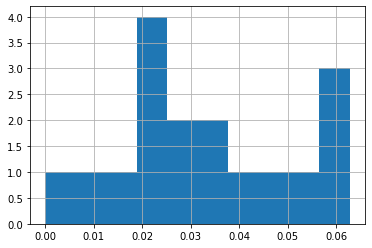

In [26]:
rating['redemption_status'].hist()

In [27]:
coupon_matrix = df.pivot_table(index = 'customer_id', columns = 'category', values = 'redemption_status')
coupon_matrix.head()

category,Bakery,"Dairy, Juices & Snacks",Flowers & Plants,Garden,Grocery,Meat,Miscellaneous,Natural Products,Packaged Meat,Pharmaceutical,Prepared Food,Restauarant,Salads,Seafood,Skin & Hair Care,Travel,Vegetables (cut)
customer_id,,,,,,,,,,,,,,,,,
1,NaN,0.0,NaN,NaN,0.005288,0.0,0.0,0.0,0.0,0.070352,0.0,NaN,0.0,0.0,0.0,NaN,NaN
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,NaN,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,NaN,0.0,0.0,NaN,0.0,0.0
5,0.0,0.0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,0.0,0.0,NaN,NaN
6,0.0,0.0,NaN,NaN,0.000000,NaN,0.0,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
rating.sort_values('total_ratings', ascending=False).head()

,redemption_status,total_ratings
category,,
Grocery,0.062813,2694248
Pharmaceutical,0.031515,1597317
Packaged Meat,0.058732,462674
Meat,0.058192,459922
Natural Products,0.021572,439051


In [30]:
bakery = coupon_matrix['Bakery']
similar_bakery = coupon_matrix.corrwith(bakery)

In [31]:
similar_bakery

category
Bakery                    1.000000
Dairy, Juices & Snacks    0.761522
Flowers & Plants          0.806118
Garden                    0.805704
Grocery                   0.596349
Meat                      0.412470
Miscellaneous             0.419227
Natural Products          0.351663
Packaged Meat             0.536650
Pharmaceutical            0.042453
Prepared Food             0.145622
Restauarant                    NaN
Salads                    0.428739
Seafood                   0.666869
Skin & Hair Care         -0.004069
Travel                    0.785631
Vegetables (cut)          0.811364
dtype: float64

In [32]:
bakery_corr = pd.DataFrame(similar_bakery, columns=['correlation'])
bakery_corr

,correlation
category,
Bakery,1.000000
"Dairy, Juices & Snacks",0.761522
Flowers & Plants,0.806118
Garden,0.805704
Grocery,0.596349
Meat,0.412470
Miscellaneous,0.419227
Natural Products,0.351663
Packaged Meat,0.536650


In [34]:
bakery_corr.dropna(inplace=True)

In [35]:
bakery_corr.sort_values('correlation', ascending=False).head()

,correlation
category,
Bakery,1.000000
Vegetables (cut),0.811364
Flowers & Plants,0.806118
Garden,0.805704
Travel,0.785631


In [37]:
bakery_corr['total_rate'] = rating['total_ratings']
bakery_corr.head()

,correlation,total_rate
category,,
Bakery,1.000000,7117
"Dairy, Juices & Snacks",0.761522,146362
Flowers & Plants,0.806118,133874
Garden,0.805704,19463
Grocery,0.596349,2694248


In [39]:
bakery_corr[bakery_corr['total_rate']>10000].sort_values('correlation', ascending=False).head()

,correlation,total_rate
category,,
Flowers & Plants,0.806118,133874
Garden,0.805704,19463
"Dairy, Juices & Snacks",0.761522,146362
Seafood,0.666869,150753
Grocery,0.596349,2694248
